<a href="https://colab.research.google.com/github/AhmedRamadan128/RNN/blob/main/Sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords

from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer

In [ ]:
movie_reviews = pd.read_csv("/content/IMDB Dataset.csv")

movie_reviews.isnull().values.any()

movie_reviews.shape

(50000, 2)

In [ ]:
movie_reviews.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
movie_reviews["review"][3]

"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. As for the shots with Jake: just ignore them."

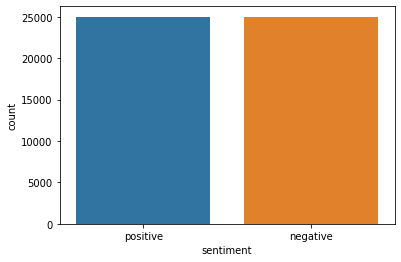

In [ ]:
import seaborn as sns

sns.countplot(x='sentiment', data=movie_reviews)

# Data Preprocessing

In [ ]:
def preprocess_text(sen):
    # Removing html tags
    sentence = remove_tags(sen)

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

In [ ]:
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)

In [ ]:
X = []
sentences = list(movie_reviews['review'])
for sen in sentences:
    X.append(preprocess_text(sen))
X[3]


'Basically there a family where little boy Jake thinks there a zombie in his closet his parents are fighting all the time This movie is slower than soap opera and suddenly Jake decides to become Rambo and kill the zombie OK first of all when you re going to make film you must Decide if its thriller or drama As drama the movie is watchable Parents are divorcing arguing like in real life And then we have Jake with his closet which totally ruins all the film expected to see BOOGEYMAN similar movie and instead watched drama with some meaningless thriller spots out of just for the well playing parents descent dialogs As for the shots with Jake just ignore them '

In [ ]:
y = movie_reviews['sentiment']
y = np.array(list(map(lambda x: 1 if x=="positive" else 0, y)))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## **Preparing the Embedding Layer**

In [ ]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
vocab_size = len(tokenizer.word_index) + 1

maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

**We will use GloVe embeddings to create our feature matrix**

In [ ]:
pip install kaggle

In [ ]:
mkdir ~/.kagglle

mkdir: cannot create directory ‘/root/.kagglle’: File exists


In [ ]:
cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download danielwillgeorge/glove6b100dtxt

 98% 129M/131M [00:02<00:00, 49.5MB/s]
100% 131M/131M [00:02<00:00, 46.4MB/s]


In [ ]:
! unzip glove6b100dtxt

Archive:  glove6b100dtxt.zip
  inflating: glove.6B.100d.txt       


In [ ]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [ ]:
embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

# **Text Classification with Simple Neural Network**

In [ ]:
model = Sequential()
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)

model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 100)          9254700   
                                                                 
 flatten_1 (Flatten)         (None, 10000)             0         
                                                                 
 dense_1 (Dense)             (None, 1)                 10001     
                                                                 
Total params: 9,264,701
Trainable params: 10,001
Non-trainable params: 9,254,700
_________________________________________________________________
None


In [ ]:
history = model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

Epoch 1/6
250/250 [==============================] - 1s 4ms/step - loss: 0.6025 - acc: 0.6726 - val_loss: 0.5695 - val_acc: 0.7015
Epoch 2/6
250/250 [==============================] - 1s 3ms/step - loss: 0.4996 - acc: 0.7579 - val_loss: 0.5344 - val_acc: 0.7344
Epoch 3/6
250/250 [==============================] - 1s 3ms/step - loss: 0.4608 - acc: 0.7848 - val_loss: 0.5379 - val_acc: 0.7329
Epoch 4/6
250/250 [==============================] - 1s 3ms/step - loss: 0.4377 - acc: 0.7977 - val_loss: 0.5222 - val_acc: 0.7498
Epoch 5/6
250/250 [==============================] - 1s 3ms/step - loss: 0.4213 - acc: 0.8076 - val_loss: 0.5248 - val_acc: 0.7459
Epoch 6/6
250/250 [==============================] - 1s 4ms/step - loss: 0.4098 - acc: 0.8142 - val_loss: 0.5675 - val_acc: 0.7231


In [ ]:
score = model.evaluate(X_test, y_test, verbose=1)

313/313 [==============================] - 1s 3ms/step - loss: 0.5640 - acc: 0.7313


In [ ]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.5639784932136536
Test Accuracy: 0.7312999963760376


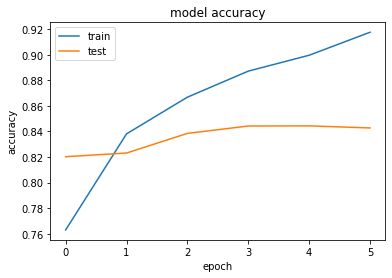

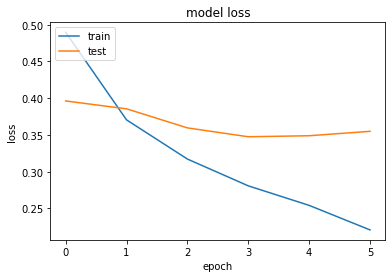

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()


# **Text Classification with Simple CNN**

In [ ]:

from tensorflow.keras.layers import Conv1D
model = Sequential()

embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)

model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 100)          9254700   
                                                                 
 conv1d (Conv1D)             (None, 96, 128)           64128     
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 9,318,957
Trainable params: 64,257
Non-trainable params: 9,254,700
_________________________________________________________________
None


In [ ]:
history = model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

score = model.evaluate(X_test, y_test, verbose=1)

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Epoch 1/6
250/250 [==============================] - 8s 32ms/step - loss: 0.3099 - acc: 0.8667 - val_loss: 0.3629 - val_acc: 0.8410
Epoch 2/6
250/250 [==============================] - 7s 29ms/step - loss: 0.2973 - acc: 0.8723 - val_loss: 0.3298 - val_acc: 0.8564
Epoch 3/6
250/250 [==============================] - 7s 28ms/step - loss: 0.2787 - acc: 0.8814 - val_loss: 0.3302 - val_acc: 0.8547
Epoch 4/6
250/250 [==============================] - 7s 28ms/step - loss: 0.2617 - acc: 0.8908 - val_loss: 0.3390 - val_acc: 0.8521
Epoch 5/6
250/250 [==============================] - 7s 28ms/step - loss: 0.2443 - acc: 0.8986 - val_loss: 0.3479 - val_acc: 0.8474
Epoch 6/6
313/313 [==============================] - 3s 10ms/step - loss: 0.3663 - acc: 0.8507
Test Score: 0.3662940561771393
Test Accuracy: 0.8507000207901001


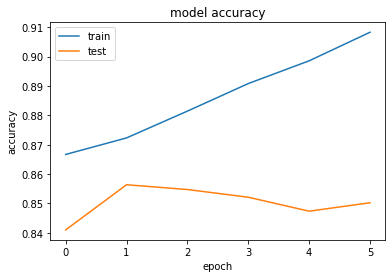

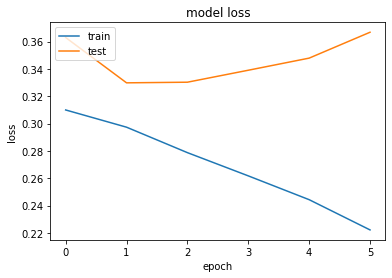

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

 **Design an RNN model for sentiment analysis using embedding_layer and lstm layer and Dense layer**

We will use Recurrent Neural Networks, and in particular LSTMs, to perform sentiment analysis in Keras.

Build our model architecture in the code cell below. 



In [ ]:
from keras.layers import LSTM
model = Sequential()
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 100, 100)          9254700   
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 9,372,077
Trainable params: 117,377
Non-trainable params: 9,254,700
_________________________________________________________________
None


In [ ]:
history = model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

score = model.evaluate(X_test, y_test, verbose=1)

Epoch 1/6
250/250 [==============================] - 11s 36ms/step - loss: 0.5558 - acc: 0.7109 - val_loss: 0.4544 - val_acc: 0.7876
Epoch 2/6
250/250 [==============================] - 7s 30ms/step - loss: 0.4537 - acc: 0.7887 - val_loss: 0.4067 - val_acc: 0.8127
Epoch 3/6
250/250 [==============================] - 7s 28ms/step - loss: 0.3986 - acc: 0.8198 - val_loss: 0.4185 - val_acc: 0.8073
Epoch 4/6
250/250 [==============================] - 7s 28ms/step - loss: 0.3687 - acc: 0.8349 - val_loss: 0.3563 - val_acc: 0.8461
Epoch 5/6
250/250 [==============================] - 7s 28ms/step - loss: 0.3446 - acc: 0.8473 - val_loss: 0.3473 - val_acc: 0.8407
Epoch 6/6
313/313 [==============================] - 3s 8ms/step - loss: 0.3462 - acc: 0.8451


In [ ]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.3462160527706146
Test Accuracy: 0.8450999855995178


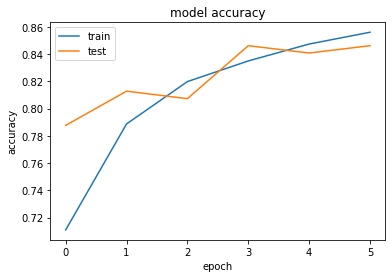

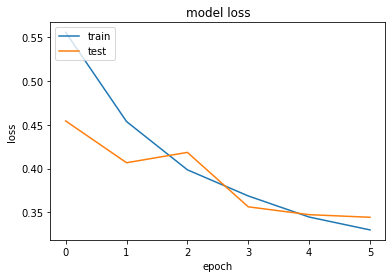

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

## **Making Predictions on Single Instance**

In [ ]:
instance = X[56]
print(instance)

The Hills Have Eyes II is what you would expect it to be and nothing more Of course it not going to be an Oscar nominated film it just pure entertainment which you can just lose yourself in for minutes The plot is basically about group of National Guard trainees who find themselves battling against the notorious mutated hillbillies on their last day of training in the desert It just them fighting back throughout the whole film which includes lot of violence which is basically the whole film as blood and guts are constantly flying around throughout the whole thing and also yet another graphic rape scene which is pointlessly thrown in to shock the audience d give the Hills Have Eyes II out of for pure entertainment and that only Although even then found myself looking at my watch more and more as the film went on as it began to drag due to the fact it continued to try and shock the audience with graphic gore and the occasional jump scene just to make sure the audience stays awake The Hil

In [ ]:
instance = tokenizer.texts_to_sequences(instance)

flat_list = []
for sublist in instance:
    for item in sublist:
        flat_list.append(item)

flat_list = [flat_list]

instance = pad_sequences(flat_list, padding='post', maxlen=maxlen)

model.predict(instance)

array([[0.99590874]], dtype=float32)